In [ ]:
!unzip data.zip


Streaming output truncated to the last 5000 lines.
  inflating: data/Train/digit_0/99552.png  
  inflating: __MACOSX/data/Train/digit_0/._99552.png  
  inflating: data/Train/digit_0/86472.png  
  inflating: __MACOSX/data/Train/digit_0/._86472.png  
  inflating: data/Train/digit_0/92407.png  
  inflating: __MACOSX/data/Train/digit_0/._92407.png  
  inflating: data/Train/digit_0/103342.png  
  inflating: __MACOSX/data/Train/digit_0/._103342.png  
  inflating: data/Train/digit_0/66586.png  
  inflating: __MACOSX/data/Train/digit_0/._66586.png  
  inflating: data/Train/digit_0/66579.png  
  inflating: __MACOSX/data/Train/digit_0/._66579.png  
  inflating: data/Train/digit_0/103395.png  
  inflating: __MACOSX/data/Train/digit_0/._103395.png  
  inflating: data/Train/digit_0/66551.png  
  inflating: __MACOSX/data/Train/digit_0/._66551.png  
  inflating: data/Train/digit_0/99585.png  
  inflating: __MACOSX/data/Train/digit_0/._99585.png  
  inflating: data/Train/digit_0/99591.png  
  inflatin

### Importing the Data

In [ ]:

import os
import pickle as pkl

import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"Pandas {pd.__version__}")
import tensorflow as tf
import cv2, pathlib, math, os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


Tensor Flow Version: 2.12.0
Keras Version: 2.12.0
Pandas 1.5.3


In [ ]:
DATA_FOLDER = "/content/data"
TRAIN_FOLDER_NAME = "Train"
TEST_FOLDER_NAME = "Test"
data= os.path.join(DATA_FOLDER)
print(data)
DATA_FOLDER
TRAIN_FOLDER_NAME

/content/data


'Train'

In [ ]:
labels_to_keep = [
    "digit_0", "digit_1", "digit_2", "digit_3", "digit_4", "digit_5", "digit_6", "digit_7", "digit_8", "digit_9"
]

### Dataset and Model Parameters

In [ ]:
RANDOM_SEED = 42

# Data parameters
IMG_HEIGHT = 32
IMG_WIDTH = 32
VALIDATION_SPLIT = 0.1

# Model parameters
BATCH_SIZE = 32
KERNEL_SIZE = (3, 3)
MAX_POOLING_SIZE = (2, 2)
DROPOUT = 0.5

num_classes = len(labels_to_keep)

In [ ]:
classes = labels_to_keep
classes_to_output_class_names = {
    "digit_0": "0", "digit_1": "1", "digit_2": "2", "digit_3": "3", "digit_4": "4", "digit_5": "5", "digit_6": "6",
    "digit_7": "7", "digit_8": "8", "digit_9": "9"
}
# output_classes = [
#     "ka", "kha", "ga", "gha", "kna", "cha", "chha", "ja", "jha", "yna", "t`a", "t`ha", "d`a", "d`ha", "adna", "ta",
#     "tha", "da", "dha", "na", "pa", "pha", "ba", "bha", "ma", "yaw", "ra", "la", "waw", "sha", "shat", "sa", "ha",
#     "aksha", "tra", "gya", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"
# ]

print("Gathering training dataset...")
train_dataset = image_dataset_from_directory(
    os.path.join(data, TRAIN_FOLDER_NAME),
    labels="inferred",
    label_mode="int",
    class_names=classes,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

print("Gathering validation dataset...")
val_dataset = image_dataset_from_directory(
    os.path.join(data, TRAIN_FOLDER_NAME),
    labels="inferred",
    label_mode="int",
    class_names=classes,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

print("Gathering test dataset...")
test_dataset = image_dataset_from_directory(
    os.path.join(data, TEST_FOLDER_NAME),
    labels="inferred",
    label_mode="int",
    class_names=classes,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=None,  # None, so that we get all the data.
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Gathering training dataset...
Found 17000 files belonging to 10 classes.
Using 15300 files for training.
Gathering validation dataset...
Found 17000 files belonging to 10 classes.
Using 1700 files for validation.
Gathering test dataset...
Found 3000 files belonging to 10 classes.


In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:
class_names_to_labels = dict([(cls_name, lbl) for cls_name, lbl in zip(classes, list(range(len(classes))))])
# print(class_names_to_labels)
labels_to_class_names = dict([(v, k) for k, v in class_names_to_labels.items()])
print(labels_to_class_names)

{0: 'digit_0', 1: 'digit_1', 2: 'digit_2', 3: 'digit_3', 4: 'digit_4', 5: 'digit_5', 6: 'digit_6', 7: 'digit_7', 8: 'digit_8', 9: 'digit_9'}


### Look at the data
Let us take a look at the data after it has been stored as a tensorflow tf.Data.Dataset object.

(32, 32, 1)


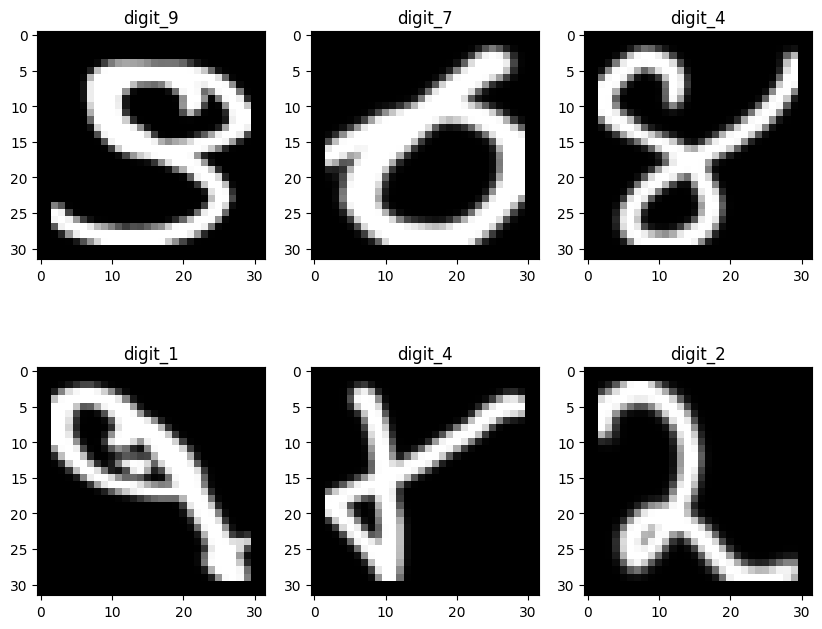

In [ ]:
# Take a look at the input data
rows = 2
columns = 3
fig = plt.figure(figsize=(10, 8))
j = 1
for images, labels in train_dataset.take(1):
    print(images[0].shape)
    for i, l in zip(images[:6], labels[:6]):
        fig.add_subplot(rows, columns, j)
        plt.imshow(tf.squeeze(i), cmap='gray', vmin=0, vmax=255)
        plt.title(labels_to_class_names[int(l)])
        j += 1

### Data Augmentation and Normalisation
#### Normalisation

The values of pixels in the images range from `[0, 255]`.

We should normalize the values to be in the `[0, 1]` range.





#### Augmentation
Augmenting the data allows us to ensure that the model doesn't just learn something that's common for the entire class, but has no meaning when it comes to classification.



In [ ]:
# Scale images to the [0, 1] range
normalization_layer = layers.Rescaling(1. / 255)
# Data Augmentations
with tf.device('/CPU:0'):
    data_augmentation_layers = keras.Sequential(
        [
            # layers.RandomFlip("horizontal",
            #                   input_shape=(IMG_HEIGHT,
            #                                IMG_WIDTH,
            #                                1)),
            # layers.RandomRotation(0.1),
            layers.RandomZoom(0.05),
            layers.RandomTranslation(0.05, 0.05),
        ]
    )

### Prefetch and Caching


In [ ]:
# prefetching and caching data to improve performance.
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Checking Data Augmentation

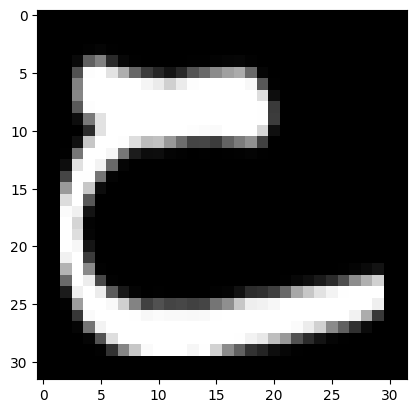

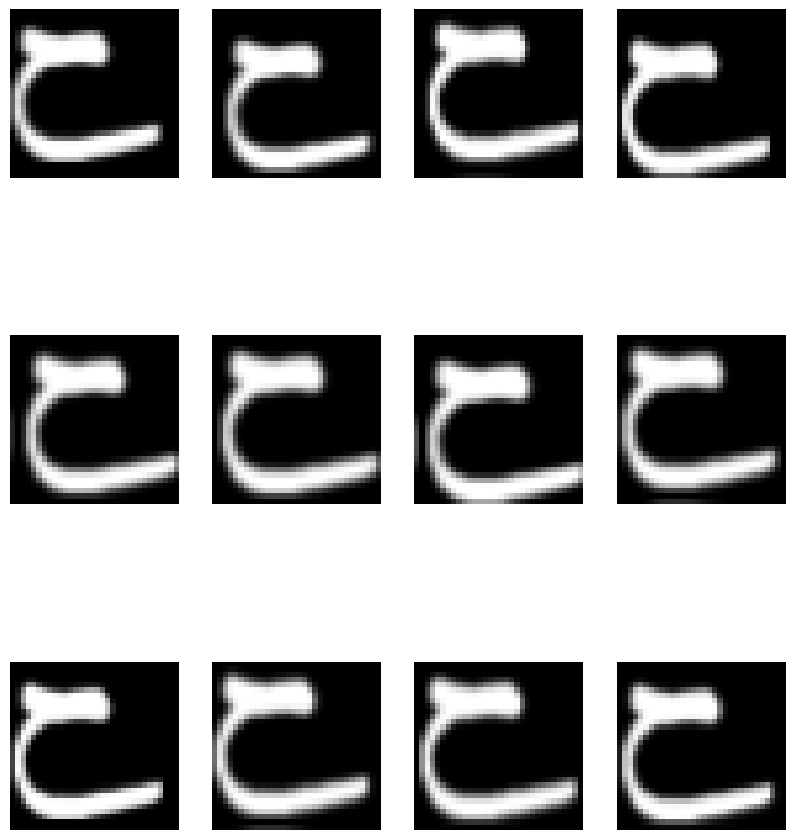

In [ ]:
rows = 3
columns = 4
for images, _ in train_dataset.take(1):
    plt.imshow(tf.squeeze(images[0]), cmap='gray', vmin=0, vmax=255)
    fig = plt.figure(figsize=(10, 12))
    for i in range(12):
        with tf.device('/CPU:0'):
            augmented_images = data_augmentation_layers(images)
        fig.add_subplot(rows, columns, i + 1)
        # plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.imshow(tf.squeeze(augmented_images[0]), cmap='gray', vmin=0, vmax=255)
        plt.axis("off")

### Creating the Model



In [ ]:
model = keras.Sequential(
    [
        data_augmentation_layers,
        normalization_layer,
        layers.Conv2D(32, kernel_size=KERNEL_SIZE, activation="relu"),
        layers.MaxPooling2D(pool_size=MAX_POOLING_SIZE),
        layers.Conv2D(64, kernel_size=KERNEL_SIZE, activation="relu"),
        layers.MaxPooling2D(pool_size=MAX_POOLING_SIZE),
        layers.Dropout(DROPOUT),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

### Compiling and Building Model


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.build(input_shape=(BATCH_SIZE, IMG_HEIGHT, IMG_WIDTH, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 32, 32, 1)           0         
                                                                 
 rescaling (Rescaling)       (32, 32, 32, 1)           0         
                                                                 
 conv2d (Conv2D)             (32, 30, 30, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 15, 15, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 13, 13, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 6, 6, 64)           0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/15
479/479 [==============================] - 25s 52ms/step - loss: 0.0610 - accuracy: 0.9822 - val_loss: 0.0158 - val_accuracy: 0.9935
Epoch 2/15
479/479 [==============================] - 25s 53ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0188 - val_accuracy: 0.9941
Epoch 3/15
479/479 [==============================] - 25s 52ms/step - loss: 0.0342 - accuracy: 0.9888 - val_loss: 0.0161 - val_accuracy: 0.9941
Epoch 4/15
479/479 [==============================] - 26s 54ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0192 - val_accuracy: 0.9935
Epoch 5/15
479/479 [==============================] - 25s 53ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0172 - val_accuracy: 0.9947
Epoch 6/15
479/479 [==============================] - 25s 52ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0105 - val_accuracy: 0.9965
Epoch 7/15
479/479 [==============================] - 25s 53ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0142 - val_accuracy:

### Measuring Performance on Training and Test Data

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
sns.lineplot(x=epochs_range, y=acc, legend='brief', label='Training Accuracy')
sns.lineplot(x=epochs_range, y=val_acc, legend='brief', label='Validation Accuracy')

fig.add_subplot(1, 2, 2)
sns.lineplot(x=epochs_range, y=loss, legend='brief', label='Training Loss')
sns.lineplot(x=epochs_range, y=val_loss, legend='brief', label='Validation Loss')
plt.show()

### Metrics

| Data       | Accuracy | Loss   |
|:-----------|:--------:|-------:|
| Training   | 99.52%   | 0.0139 |
| Validation | 99.65%   | 0.0107 |

<!-- Training Accuracy: 99.52%

Validation Accuracy: 99.65%

Training Loss: 0.0139

Validation Loss: 0.0107 -->


We can see that the model's accuracy and validation accuracy quickly went up during and after the first epoch and then it saturated around epoch #10.

Training and validation loss also fell dramatically after the second epoch, and reached a saturation around epoch #11.

In [ ]:
print("Evaluate")
result = model.evaluate(test_dataset)
result = dict(zip(model.metrics_names, result))

### Test Metrics

| Data | Accuracy |   Loss |
|:-----|:--------:|-------:|
| Test |  99.56%  | 0.0189 |

#### Overall this is a great result, and it shows that the model has generalized properly and has low variance, while having high bias.

### Saving the Model

In [ ]:
MODEL_FOLDER = "./models"
HINDI_MNIST_FOLDER = "hindi_mnist"
MODEL_SAVE_FOLDER = os.path.join(MODEL_FOLDER, HINDI_MNIST_FOLDER)
MODEL_SAVE_PATH = os.path.join(MODEL_FOLDER, HINDI_MNIST_FOLDER, "model.h5")
# pickle files
CLASSES_PKL_FILE = "classes.pickle"
CLASSES_PKL_PATH = os.path.join(MODEL_SAVE_FOLDER, CLASSES_PKL_FILE)

In [ ]:
model.save(
    MODEL_SAVE_PATH, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True
)

In [ ]:
with open(CLASSES_PKL_PATH, 'wb') as f:
    pkl.dump(classes, f)
    pkl.dump(labels_to_class_names, f)

In [ ]:
# Delete model and labels_to_class_names to check if we correctly saved the model by loading it from disk and re-evaluating on test data.
del model
del classes
del labels_to_class_names

In [ ]:
import pickle as pkl
from keras.models import load_model

In [ ]:
model = load_model(MODEL_SAVE_PATH)

with open(CLASSES_PKL_PATH, 'rb') as f:
    classes = pkl.load(f)
    labels_to_class_names = pkl.load(f)

In [ ]:
print("Evaluate")
result = model.evaluate(test_dataset)
result = dict(zip(model.metrics_names, result))
print(result)


Evaluate
 1/94 [..............................] - ETA: 18s - loss: 5.8462e-05 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


94/94 [==============================] - 2s 15ms/step - loss: 0.0212 - accuracy: 0.9943
{'loss': 0.021188417449593544, 'accuracy': 0.9943333268165588}


In [ ]:
epochs = 30
batch_size = 32
img_height, img_width = 300, 300
input_shape = (img_height, img_width, 3)

def create_data_sparse():
    data_gen = ImageDataGenerator(rescale=1.0 / 255)
    train_ds = data_gen.flow_from_directory('//content/data/Train', target_size=(img_height, img_width),
                                            class_mode='sparse', batch_size=batch_size, subset='training')
    test_ds = data_gen.flow_from_directory('/content/data/Test', target_size=(img_height, img_width),
                                          class_mode='sparse', batch_size=batch_size, shuffle=False)

    return train_ds, test_ds
train_ds, test_ds = create_data_sparse()

Found 17000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [ ]:
class ConvLayer(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides, padding, input_shape):
        super(ConvLayer, self).__init__()
        self.C1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding,
                         input_shape=input_shape)
        self.B1 = BatchNormalization()
        self.A1 = Activation('relu')

    def call(self, x):
        x = self.C1(x)
        x = self.B1(x)
        y = self.A1(x)
        return y


class BaseNet(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides, padding, pool_size, dropout_rate):
        super(BaseNet, self).__init__()
        self.C1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
        self.B1 = BatchNormalization()
        self.A1 = Activation('relu')
        self.P1 = MaxPooling2D(pool_size=pool_size, strides=2, padding=padding)
        self.Dr1 = Dropout(dropout_rate)

    def call(self, x):
        x = self.C1(x)
        x = self.B1(x)
        x = self.A1(x)
        x = self.P1(x)
        y = self.Dr1(x)
        return y



def GELU(x):
    res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))
    return res



class ResMLPBlock(tf.keras.layers.Layer):
    def __init__(self, units, residual_path):
        super(ResMLPBlock, self).__init__()
        self.residual_path = residual_path
        self.D1 = Dense(units, activation='relu')
        self.D2 = Dense(units, activation='relu')

        if self.residual_path:
            self.D3 = Dense(units)
            self.D4 = Dense(units)

    def call(self, inputs):
        residual = inputs

        x = self.D1(inputs)
        y = self.D2(x)

        if self.residual_path:
            residual = self.D3(inputs)
            residual = GELU(residual)
            residual = self.D4(residual)
            residual = GELU(residual)

        output = y + residual
        return output



class ResMLP(tf.keras.Model):
    def __init__(self, initial_filters, block_list, num_classes):
        super(ResMLP, self).__init__()
        self.initial_filters = initial_filters
        self.block_list = block_list

        self.D1 = Dense(self.initial_filters, activation='relu')
        self.B1 = BatchNormalization()

        self.blocks = tf.keras.models.Sequential()
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=True)
                else:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=False)
                self.blocks.add(block)
            self.initial_filters *= 2

        self.D2 = Dense(num_classes, activation='softmax')


    def call(self, inputs):
        x = self.D1(inputs)
        x = self.B1(x)
        x = self.blocks(x)
        y = self.D2(x)
        return y

In [ ]:
class NetWork(tf.keras.Model):
    def __init__(self, filters, kernel_size, strides, padding, input_shape, pool_size,
                 dropout_rate, initial_units, block_list, num_classes):
        super(NetWork, self).__init__()

        self.layer1 = ConvLayer(filters=filters, kernel_size=kernel_size,
                              strides=strides, padding=padding, input_shape=input_shape)

        self.layer2 = BaseNet(filters=filters * 2, kernel_size=kernel_size,
                              strides=strides, padding=padding,
                              pool_size=pool_size, dropout_rate=dropout_rate)
        self.layer3 = BaseNet(filters=filters * 2, kernel_size=kernel_size,
                              strides=strides, padding=padding,
                              pool_size=pool_size, dropout_rate=dropout_rate)
        self.layer4 = BaseNet(filters=filters, kernel_size=kernel_size,
                              strides=strides, padding=padding,
                              pool_size=pool_size, dropout_rate=dropout_rate)

        self.P1 = GlobalAveragePooling2D()


        self.layer5 = ResMLP(initial_filters=initial_units, block_list=block_list, num_classes=num_classes)


    def call(self, x):
        x = self.layer1(x)

        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.P1(x)


        y = self.layer5(x)
        return y


    def __repr__(self):
        name = 'ml'
        return name

In [ ]:
net = NetWork(filters=32, kernel_size=(3 * 3), strides=1, padding='same', input_shape=input_shape,
              pool_size=(2 * 2), dropout_rate=0.3, initial_units=32, block_list=[2, 2, 2], num_classes=10)

net.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['sparse_categorical_accuracy'])

history = net.fit(train_ds, epochs=3, batch_size=batch_size, validation_data=test_ds)

net.summary()

Epoch 1/3
479/479 [==============================] - ETA: 0s - loss: 0.4083 - sparse_categorical_accuracy: 0.8639

UnimplementedError: ignored